# 人脸检测

人脸检测，顾名思义，从图像中找到人脸。这是计算机视觉中一个非常经典的物体检测问题。经典人脸检测算法如Viola-Jones算法已经内置在OpenCV中，一度是使用OpenCV实现人脸检测的默认方案。不过OpenCV最新发布的4.5.4版本中提供了一个全新的基于神经网络的人脸检测器。这篇笔记展示了该检测器的使用方法。

## 准备工作

首先载入必要的包，并检查OpenCV版本。

如果你还没有安装OpenCV，可以通过如下命令安装：
```bash 
pip install opencv-python
```

In [1]:
import cv2
from PIL import Image

print(f"你需要OpenCV 4.5.4或者更高版本。当前版本为：{cv2.__version__}")


你需要OpenCV 4.5.4或者更高版本。当前版本为：4.5.4


请从下方地址下载模型文件，并将模型文件放置在当前目录下。

模型下载地址：https://github.com/ShiqiYu/libfacedetection.train/tree/master/tasks/task1/onnx

当前目录为：

In [2]:

!pwd


/Users/Robin/Developer/Playground/Face_Detection


## 构建检测器

检测器的构建函数为`FaceDetectorYN_create`，必选参数有三个：
- `model` ONNX模型路径
- `config` 配置（使用ONNX时为可选项）
- `input_size` 输入图像的尺寸。如果构建时输入尺寸未知，可以在执行前指定。

In [3]:
face_detector = cv2.FaceDetectorYN_create("yunet.onnx", "", (0, 0))
print("检测器构建完成。")


检测器构建完成。


## 执行检测

一旦检测器构建完成，便可以使用`detect`方法检测人脸。注意，如果在构建时未指定输入大小，可以在调用前通过`setInputSzie`方法指定。

In [4]:
# 读入待检测图像。图像作者：@anyataylorjoy on Instagram
image = cv2.imread("queen.jpg")

# 获取图像大小并设定检测器
height, width, _ = image.shape
face_detector.setInputSize((width, height))

# 执行检测
result, faces = face_detector.detect(image)

print("检测完成。")


检测完成。


## 绘制检测结果

首先将检测结果打印出来。

In [5]:
print(faces)


[[136.21078    77.48543   118.0509    143.32883   173.94562   147.02783
  222.2979    139.54152   205.95425   172.52359   185.9506    192.57774
  226.84074   186.21704     0.9998491]]


检测结果为一个嵌套列表。最外层代表了检测结果的数量，即检测到几个人脸。每一个检测结果包含15个数。其含义如下。

| 序号 | 含义 |
| --- | --- |
| 0 | 人脸框坐标x | 
| 1 | 人脸框坐标y |
| 2 | 人脸框的宽度 |
| 3 | 人脸框的高度 |
| 4 | 左眼瞳孔坐标x |
| 5 | 左眼瞳孔坐标y |
| 6 | 右眼瞳孔坐标x |
| 7 | 右眼瞳孔坐标y |
| 8 | 鼻尖坐标x |
| 9 | 鼻尖坐标y |
| 10 | 左侧嘴角坐标x |
| 11 | 左侧嘴角坐标y |
| 12 | 右侧嘴角坐标x |
| 13 | 右侧嘴角坐标y |
| 14 | 人脸置信度分值 |

接下来依次在图中绘制这些坐标。

### 绘制人脸框

OpenCV提供了`rectangle`与`cirle`函数用于在图像中绘制方框与圆点。首先使用`rectangle`绘制人脸框。

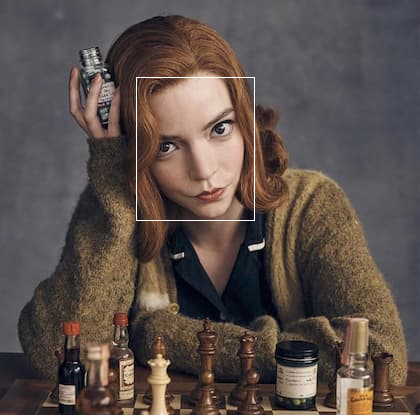

In [6]:
# 提取第一个检测结果，并将坐标转换为整数，用于绘制。
face = faces[0].astype(int)

# 获得人脸框的位置与宽高。
x, y, w, h = face[:4]

# 在图像中绘制结果。
image_with_marks = cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255))

# 显示绘制结果
display(Image.fromarray(cv2.cvtColor(image_with_marks, cv2.COLOR_BGR2RGB)))


# 绘制五官坐标

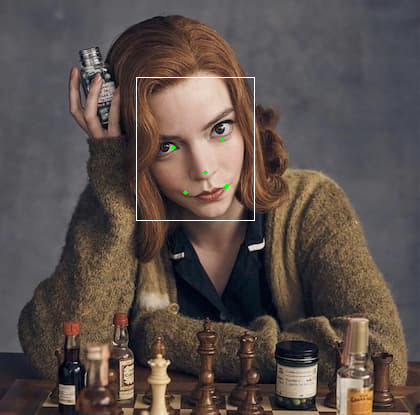

In [7]:
# 绘制瞳孔位置
left_eye_x, left_eye_y, right_eye_x, right_eye_y = face[4:8]
cv2.circle(image_with_marks, (left_eye_x, left_eye_y), 2, (0, 255, 0), -1)
cv2.circle(image_with_marks, (right_eye_x, right_eye_y), 2, (0, 255, 0), -1)

# 绘制鼻尖
nose_x, nose_y = face[8:10]
cv2.circle(image_with_marks, (nose_x, nose_y), 2, (0, 255, 0), -1)

# 绘制嘴角
mouth_left_x, mouth_left_y, mouth_right_x, mouth_right_y = face[10:14]
cv2.circle(image_with_marks, (mouth_left_x, mouth_left_y), 2, (0, 255, 0), -1)
cv2.circle(image_with_marks, (mouth_right_x, mouth_right_y), 2, (0, 255, 0), -1)

# 显示绘制结果
display(Image.fromarray(cv2.cvtColor(image_with_marks, cv2.COLOR_BGR2RGB)))

## 性能测试

人脸检测器很有可能用在一些实时运算场景。此时的性能便是一个不可忽略的因素。下边这段代码展示了新版人脸检测器在当前计算设备上的运行速度。

In [8]:
tm = cv2.TickMeter()
for _ in range(1000):
    tm.start()
    _ = face_detector.detect(image)
    tm.stop()
print(f"检测速度：{tm.getFPS():.0f} FPS")

检测速度：61 FPS


## 总结

OpenCV 4.5.4提供的人脸检测器采用了基于神经网络的方案。与先前基于Viola-Jones算法的方案相比还可以提供面部五官的位置。可以考虑作为默认检测方案使用。